In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings

Evaluating Naive Bayes
Model: Naive Bayes
Accuracy: 1.0
F1 Score: 1.0
Recall: 1.0
Precision: 1.0


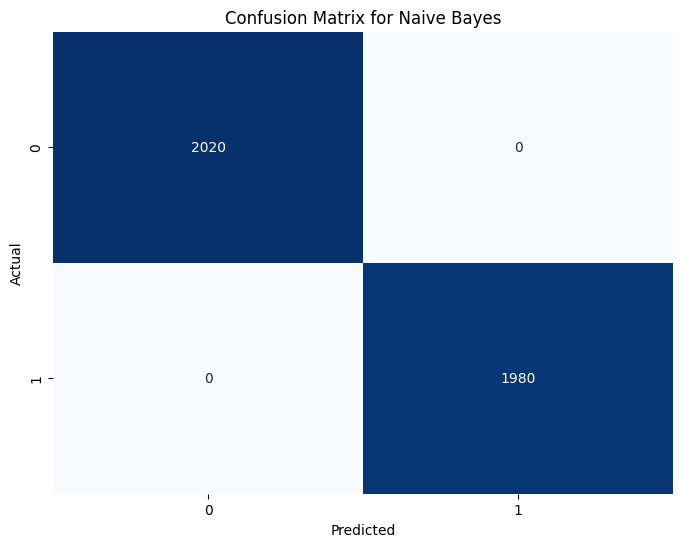

Evaluating Logistic Regression
Model: Logistic Regression
Accuracy: 1.0
F1 Score: 1.0
Recall: 1.0
Precision: 1.0


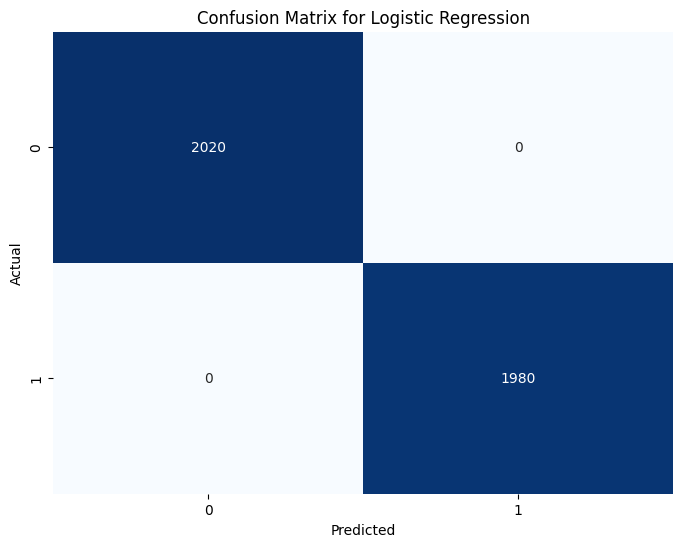

Evaluating Linear Classification
Model: Linear Classification
Accuracy: 0.99975
F1 Score: 0.9997499993593078
Recall: 0.99975
Precision: 0.9997501237011381


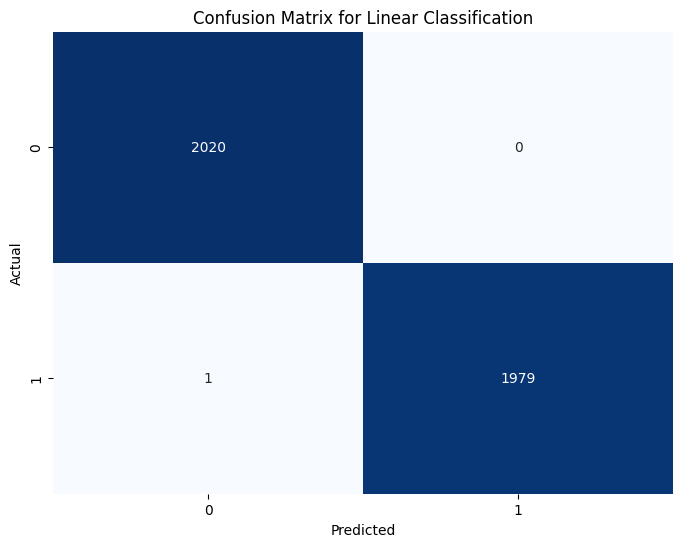

Evaluating KNN
Model: KNN
Accuracy: 0.84375
F1 Score: 0.8395757908826937
Recall: 0.84375
Precision: 0.8806710775047258


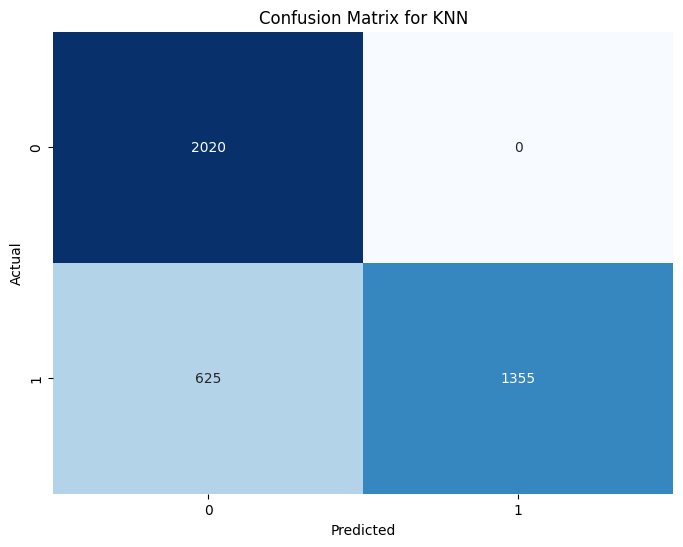

Evaluating SVM
Model: SVM
Accuracy: 0.9985
F1 Score: 0.9984999741215775
Recall: 0.9985
Precision: 0.9985044422507403


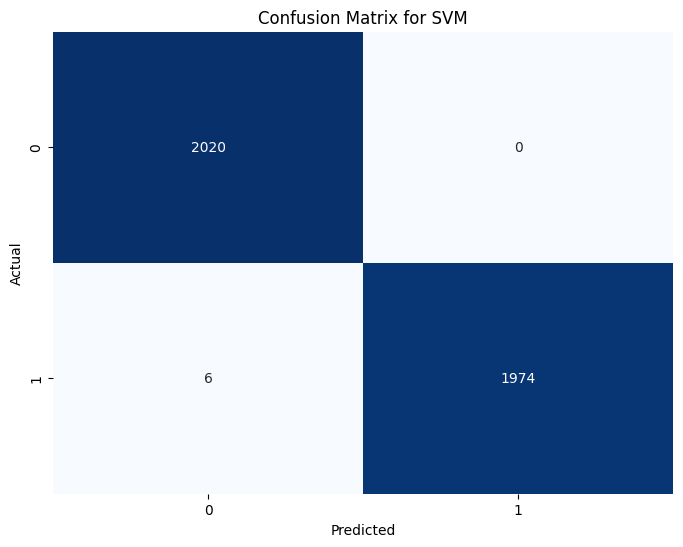

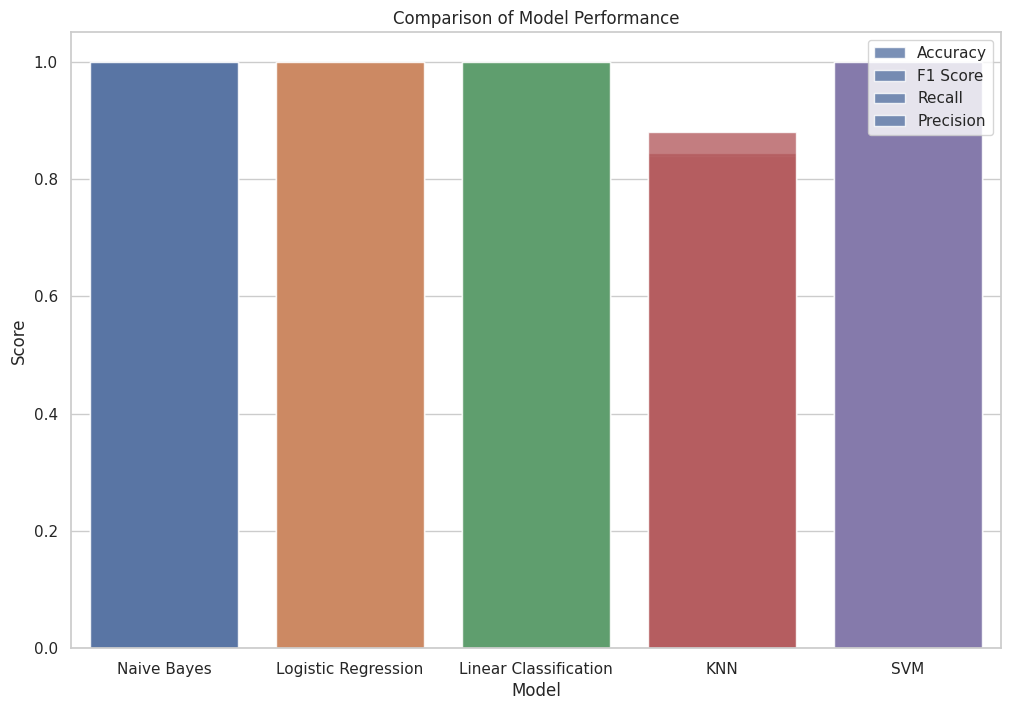

In [3]:
warnings.simplefilter("ignore")

# Loading the dataset
data = pd.read_csv("/kaggle/input/viet-lao-detection/viet-lao.csv")
# Value count for each language
data["Language"].value_counts()
# Separating the independent and dependent features
X = data["Text"]
y = data["Language"]
# Converting categorical variables to numerical
le = LabelEncoder()
y = le.fit_transform(y)
# Creating a list for appending the preprocessed text
data_list = []
# Iterating through all the text
for text in X:
    # Removing the symbols and numbers
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # Converting the text to lower case
    text = text.lower()
    # Appending to data_list
    data_list.append(text)
# Creating bag of words using CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
# Train test splitting
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Define the models to use
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Linear Classification": SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, max_iter=200, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear')
}

# Lists to store results
model_names = []
accuracies = []
f1_scores = []
recalls = []
precisions = []

# Function to evaluate models
def evaluate_model(model, x_train, y_train, x_test, y_test, model_name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    ac = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    # Storing the results
    model_names.append(model_name)
    accuracies.append(ac)
    f1_scores.append(f1)
    recalls.append(recall)
    precisions.append(precision)

    print(f"Model: {model_name}")
    print(f"Accuracy: {ac}")
    print(f"F1 Score: {f1}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function for prediction
def predict(text, model, cv, le):
    # Preprocess text
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    text = text.lower()
    # Vectorize text
    text_vectorized = cv.transform([text]).toarray()
    # Predict using the model
    prediction = model.predict(text_vectorized)
    # Convert prediction to language
    predicted_language = le.inverse_transform(prediction)[0]
    return predicted_language

# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    evaluate_model(model, x_train, y_train, x_test, y_test, model_name)

# Plotting the performance metrics
metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
results = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'F1 Score': f1_scores,
    'Recall': recalls,
    'Precision': precisions
})

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
for metric in metrics:
    sns.barplot(x='Model', y=metric, data=results, alpha=0.8, label=metric)

plt.title('Comparison of Model Performance')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.show()

In [4]:
# Vietnamese
text = "Bạn ổn không ?"
model = models["Naive Bayes"]
predicted_language = predict(text, model, cv, le)
print(f"Predicted Language: {predicted_language}")

Predicted Language: Vietnamese


In [5]:
# Lao
text = "ເຈົ້າ​ສະ​ບາຍ​ດີ​ບໍ່ ?"
model = models["Naive Bayes"]
predicted_language = predict(text, model, cv, le)
print(f"Predicted Language: {predicted_language}")

Predicted Language: Lao


In [6]:
# Vietnamese
text = "Bạn ổn không ?"
model = models["SVM"]
predicted_language = predict(text, model, cv, le)
print(f"Predicted Language: {predicted_language}")

Predicted Language: Vietnamese


In [7]:
# Lao
text = "ເຈົ້າ​ສະ​ບາຍ​ດີ​ບໍ່ ?"
model = models["SVM"]
predicted_language = predict(text, model, cv, le)
print(f"Predicted Language: {predicted_language}")

Predicted Language: Lao
